### import library

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras

### Data preparation

In [4]:
img_df = pd.read_csv("/content/drive/MyDrive/senior/cloud segmentations/out_data_2.csv") # cloud segmentations/out_data_2.csv

In [5]:
img_df.head()

,date,time,path_list
0,2021-11-16,11:15:59,2021_11_16__11_15_59_HDR_cropped.jpg
1,2021-11-16,11:16:20,2021_11_16__11_16_20_HDR_cropped.jpg
2,2021-11-16,11:16:40,2021_11_16__11_16_40_HDR_cropped.jpg
3,2021-11-16,11:17:01,2021_11_16__11_17_01_HDR_cropped.jpg
4,2021-11-16,11:17:21,2021_11_16__11_17_21_HDR_cropped.jpg


In [6]:
img_df["filename"] = "/content/drive/MyDrive/senior/cloud_dataset/" + img_df["path_list"]

In [25]:
img_df

,date,time,path_list,filename
0,2021-11-16,11:15:59,2021_11_16__11_15_59_HDR_cropped.jpg,/content/drive/MyDrive/senior/cloud_dataset/20...
1,2021-11-16,11:16:20,2021_11_16__11_16_20_HDR_cropped.jpg,/content/drive/MyDrive/senior/cloud_dataset/20...
2,2021-11-16,11:16:40,2021_11_16__11_16_40_HDR_cropped.jpg,/content/drive/MyDrive/senior/cloud_dataset/20...
3,2021-11-16,11:17:01,2021_11_16__11_17_01_HDR_cropped.jpg,/content/drive/MyDrive/senior/cloud_dataset/20...
4,2021-11-16,11:17:21,2021_11_16__11_17_21_HDR_cropped.jpg,/content/drive/MyDrive/senior/cloud_dataset/20...
...,...,...,...,...
25192,2021-12-16,13:58:00,2021_12_16__13_58_00_HDR_cropped.jpg,/content/drive/MyDrive/senior/cloud_dataset/20...
25193,2021-12-16,13:59:00,2021_12_16__13_59_00_HDR_cropped.jpg,/content/drive/MyDrive/senior/cloud_dataset/20...
25194,2021-12-16,14:00:00,2021_12_16__14_00_00_HDR_cropped.jpg,/content/drive/MyDrive/senior/cloud_dataset/20...
25195,2021-12-16,14:01:00,2021_12_16__14_01_00_HDR_cropped.jpg,/content/drive/MyDrive/senior/cloud_dataset/20...


In [27]:
cc_df = pd.read_csv("/content/drive/MyDrive/senior/Bangkhuntean_CloudCover_2021-16Nov-16Dec (2).csv")
cc_df.head()

,Year,Month,Day,Hour,Minute,Second,CloudCover
0,2021,11,16,11,15,59,0.990
1,2021,11,16,11,16,20,0.989
2,2021,11,16,11,16,40,0.989
3,2021,11,16,11,17,1,0.988
4,2021,11,16,11,17,21,0.988


In [28]:
print(len(img_df))
print(len(cc_df))

25197
22026


In [29]:
cc_df["date"] = cc_df["Year"].astype(str) + "-" + cc_df["Month"].astype(str) + "-" + cc_df["Day"].astype(str)
cc_df["time"] = cc_df["Hour"].astype(str).str.zfill(2) + ":" + cc_df["Minute"].astype(str).str.zfill(2) + ":" + cc_df["Second"].astype(str).str.zfill(2)
cc_df

,Year,Month,Day,Hour,Minute,Second,CloudCover,date,time
0,2021,11,16,11,15,59,0.990,2021-11-16,11:15:59
1,2021,11,16,11,16,20,0.989,2021-11-16,11:16:20
2,2021,11,16,11,16,40,0.989,2021-11-16,11:16:40
3,2021,11,16,11,17,1,0.988,2021-11-16,11:17:01
4,2021,11,16,11,17,21,0.988,2021-11-16,11:17:21
...,...,...,...,...,...,...,...,...,...
22021,2021,12,16,13,58,0,0.168,2021-12-16,13:58:00
22022,2021,12,16,13,59,0,0.169,2021-12-16,13:59:00
22023,2021,12,16,14,0,0,0.147,2021-12-16,14:00:00
22024,2021,12,16,14,1,0,0.145,2021-12-16,14:01:00


In [31]:
len(cc_df)

22026

In [20]:
df = img_df.merge(cc_df, on=['date','time'],how='right')

In [21]:
len(df)

22026

In [22]:
df.isna().sum()

date             0
time             0
path_list     3759
filename      3759
Year             0
Month            0
Day              0
Hour             0
Minute           0
Second           0
CloudCover       0
dtype: int64

In [24]:
df.to_csv("df.csv", index=False)

In [ ]:
df = df.drop(columns=["date", "time","sun degree", "path_list", "Year", "Month", "Day", "Hour", "Minute", "Second"])
df.head()

,filename,CloudCover
0,/content/drive/MyDrive/senior/cloud_dataset/20...,0.990
1,/content/drive/MyDrive/senior/cloud_dataset/20...,0.989
2,/content/drive/MyDrive/senior/cloud_dataset/20...,0.989
3,/content/drive/MyDrive/senior/cloud_dataset/20...,0.988
4,/content/drive/MyDrive/senior/cloud_dataset/20...,0.988


In [ ]:
df.to_csv("final_out_data.csv", index=False)

In [ ]:
train_df, test_df = train_test_split(df, train_size=0.7, shuffle=True, random_state=42)

In [ ]:
print("Train size:", train_df.shape)
print("Test size:", test_df.shape)

Train size: (10052, 2)
Test size: (4309, 2)


### Training

In [ ]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

In [ ]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='filename',
    y_col='CloudCover',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='raw',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='filename',
    y_col='CloudCover',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='raw',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='filename',
    y_col='CloudCover',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='raw',
    batch_size=32,
    shuffle=False
)

Found 8041 validated image filenames.


/usr/local/lib/python3.9/dist-packages/keras/preprocessing/image.py:1137: UserWarning: Found 1 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


Found 2010 validated image filenames.
Found 4309 validated image filenames.


In [ ]:
base_model = tf.keras.applications.ResNet50( weights = 'imagenet',include_top = False,input_shape = (224,224,3))

94765736/94765736 [==============================] - 4s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
model = tf.keras.Sequential()
model.add(base_model)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64,activation = 'relu'))
model.add(tf.keras.layers.Dense(64,activation = 'relu'))
model.add(tf.keras.layers.Dense(1,activation = 'linear'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 64)                6422592   
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 30,014,529
Trainable params: 6,426,817
Non-trainable params: 23,587,712
_________________________________________________________________
None


In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.AdamW(learning_rate=10e-4),
    loss='mse'
)

In [ ]:
history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=10,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ]
)

Epoch 1/10
252/252 [==============================] - 5404s 21s/step - loss: 1.7230 - val_loss: 0.0408
Epoch 2/10
252/252 [==============================] - 233s 923ms/step - loss: 0.0349 - val_loss: 0.0339
Epoch 3/10
252/252 [==============================] - 233s 925ms/step - loss: 0.0322 - val_loss: 0.0329
Epoch 4/10
252/252 [==============================] - 232s 923ms/step - loss: 0.0333 - val_loss: 0.0475
Epoch 5/10
252/252 [==============================] - 232s 920ms/step - loss: 0.0322 - val_loss: 0.0215
Epoch 6/10
252/252 [==============================] - 233s 924ms/step - loss: 0.0261 - val_loss: 0.0269
Epoch 7/10
252/252 [==============================] - 232s 922ms/step - loss: 0.0283 - val_loss: 0.0213
Epoch 8/10
252/252 [==============================] - 234s 928ms/step - loss: 0.0266 - val_loss: 0.0242
Epoch 9/10
252/252 [==============================] - 234s 927ms/step - loss: 0.0200 - val_loss: 0.0218
Epoch 10/10
252/252 [==============================] - 233s 924ms

In [ ]:
model_json = model.to_json()
with open("/content/drive/MyDrive/senior/cloud segmentations/cloudSeg_model/json-cloud-regression-resnet50-adamw-10-1e_4.json", "w") as json_file:
  json_file.write(model_json)

model.save_weights('/content/drive/MyDrive/senior/cloud segmentations/cloudSeg_model/weight-cloud-regression-resnet50-adamw-10-1e_4.h5')
model.save('/content/drive/MyDrive/senior/cloud segmentations/cloudSeg_model/model-cloud-regression-resnet50-adamw-10-1e_4.h5')

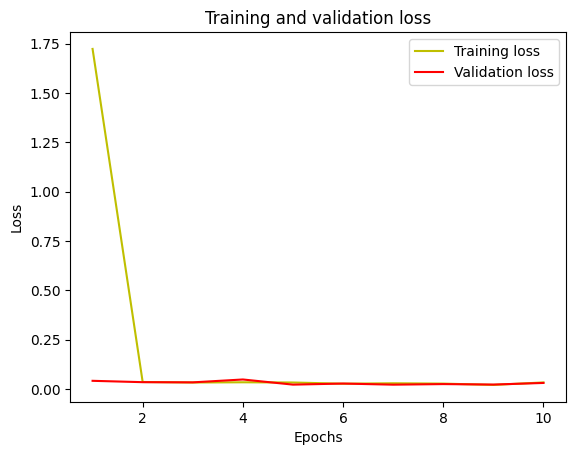

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
predicted_cloud = np.squeeze(model.predict(test_images))
true_cloud = test_images.labels

rmse = np.sqrt(model.evaluate(test_images, verbose=0))
print("     Test RMSE: {:.5f}".format(rmse))

r2 = r2_score(true_cloud, predicted_cloud)
print("Test R^2 Score: {:.5f}".format(r2))

135/135 [==============================] - 2270s 17s/step
     Test RMSE: 0.16976


NameError: ignored

In [ ]:
from sklearn.metrics import r2_score
print(rmse)
print(r2_score(true_cloud, predicted_cloud))

0.16976169183127354
0.6689189181211476


In [ ]:
null_rmse = np.sqrt(np.sum((true_cloud - np.mean(true_cloud))**2) / len(true_cloud))
print("Null/Baseline Model Test RMSE: {:.5f}".format(null_rmse))

Null/Baseline Model Test RMSE: 0.29503
